In [176]:
# Install spark-related dependencies
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.0.0-preview2/spark-3.0.0-preview2-bin-hadoop2.7.tgz
!tar -xvf spark-3.0.0-preview2-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install joypy
!pip install pywaffle
!pip install squarify


tar: spark-3.0.0-preview2-bin-hadoop2.7.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop2.7"

In [0]:
import findspark
findspark.init('/content/spark-3.0.0-preview2-bin-hadoop2.7/')
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [217]:
#Esto se hace para que colab pueda acceder a los datos de drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive


Leyendo datos de entrada

In [0]:
covid = spark.read.options(header="true",inferschema = "true", sep = ",").csv('/content/gdrive/My Drive/HackathonIBM/archivos/CasosNew.csv')

In [219]:
covid.show()

+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+
|ID de caso|Fecha de notificación|Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|Estado| País de procedencia|                 FIS|Fecha de muerte|   Fecha diagnostico|    Fecha recuperado|   fecha reporte web|
+----------+---------------------+---------------+-------------------+------------------------+----------+----+----+-----------+------+--------------------+--------------------+---------------+--------------------+--------------------+--------------------+
|         1| 2020-03-02T00:00:...|          11001|        Bogotá D.C.|             Bogotá D.C.|Recuperado|  19|   F|  Importado|  Leve|              ITALIA|2020-02-27T00:00:...|          -   -|2020-03-06T00:00:...|2020-03-13T00:0

In [0]:
import numpy as np
import pandas as pd

In [0]:

covidpanda = covid.toPandas()
#ID de caso|Fecha de notificación|Codigo DIVIPOLA|Ciudad de ubicación|Departamento o Distrito |  atención|Edad|Sexo|       Tipo|Estado| País de procedencia|                 FIS|Fecha de muerte|   Fecha diagnostico|    Fecha recuperado|   fecha reporte web|

covidpanda.columns = ['ID', 'fecha_noti', 'cod_ciudad', 'ciudad', 'departamento', 'estado', 'edad', 'sexo', 'tipo', 'nivel_estado', 'procedencia', 'fis', 'fecha_muerte', 'fecha_diagnostico', 'fecha_recuperacion', 'fecha_reporte_web']

In [222]:
covidpanda

ID  ...        fecha_reporte_web
0        1  ...  2020-03-06T00:00:00.000
1        2  ...  2020-03-09T00:00:00.000
2        3  ...  2020-03-09T00:00:00.000
3        4  ...  2020-03-11T00:00:00.000
4        5  ...  2020-03-11T00:00:00.000
...    ...  ...                      ...
5137  5138  ...  2020-04-25T00:00:00.000
5138  5139  ...  2020-04-25T00:00:00.000
5139  5140  ...  2020-04-25T00:00:00.000
5140  5141  ...  2020-04-25T00:00:00.000
5141  5142  ...  2020-04-25T00:00:00.000

[5142 rows x 16 columns]

In [223]:
#print(len(covidpanda['estado'].unique()))
#covidpanda['estado'].unique()


6


array(['Recuperado', 'Casa', 'Fallecido', 'Hospital UCI', 'Hospital',
       'casa'], dtype=object)

In [0]:
import matplotlib.pyplot as plt

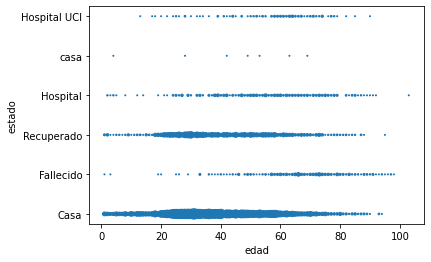

In [225]:
covid_df = covidpanda.groupby(['edad', 'estado'])['ID'].agg('count').reset_index()
covid_df.plot.scatter(x='edad', y='estado', s=covid_df['ID'])

In [226]:
covid_df = covidpanda.groupby(['departamento', 'estado'])['ID'].agg('count').reset_index()
covid_df.plot.scatter(x='estado', y='departamento', s=covid_df['ID']/(5), figsize=(8,10))

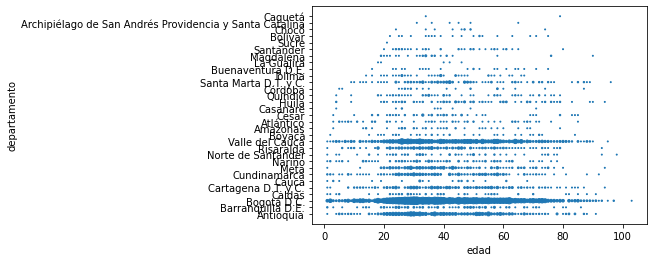

In [227]:

covid_df = covidpanda.groupby(['edad', 'departamento'])['ID'].agg('count').reset_index()
covid_df.plot.scatter(x='edad', y='departamento', s=covid_df['ID'])

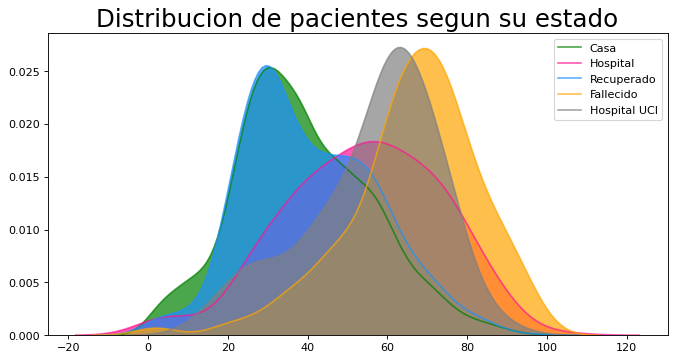

In [228]:
df = covidpanda

import seaborn as sns
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.kdeplot(df.loc[df['estado'] == "Casa", "edad"], shade=True, color="g", label="Casa", alpha=.7)
sns.kdeplot(df.loc[df['estado'] == "Hospital", "edad"], shade=True, color="deeppink", label="Hospital", alpha=.7)
sns.kdeplot(df.loc[df['estado'] == "Recuperado", "edad"], shade=True, color="dodgerblue", label="Recuperado", alpha=.7)
sns.kdeplot(df.loc[df['estado'] == "Fallecido", "edad"], shade=True, color="orange", label="Fallecido", alpha=.7)
sns.kdeplot(df.loc[df['estado'] == "Hospital UCI", "edad"], shade=True, color="gray", label="Hospital UCI", alpha=.7)

# Decoration
plt.title('Distribucion de pacientes segun su estado', fontsize=22)
plt.legend()
plt.show()

In [229]:
# Draw Plot
plt.figure(figsize=(10,5), dpi= 80)
sns.distplot(df.loc[df['estado'] == "Casa", "edad"], color="g", label="Casa", hist_kws={'alpha':.1}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['estado'] == "Hospital", "edad"], color="deeppink", label="Hospital", hist_kws={'alpha':.1}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['estado'] == "Recuperado", "edad"], color="dodgerblue", label="Recuperado", hist_kws={'alpha':.1}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['estado'] == "Fallecido", "edad"], color="orange", label="Fallecido", hist_kws={'alpha':.1}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['estado'] == "Hospital UCI", "edad"], color="gray", label="Hospital UCI", hist_kws={'alpha':.1}, kde_kws={'linewidth':3})
#plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

In [230]:
import joypy
# Draw Plot
plt.figure(figsize=(16,10), dpi= 50)
covidpanda['estado_clean'] = np.where(df['estado']=='casa', 'Casa', df['estado'])
fig, axes = joypy.joyplot(covidpanda,column=['edad'], by="estado_clean", figsize=(10,5))
#joypy.joyplot(iris, by="Name")

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

<Figure size 800x500 with 0 Axes>

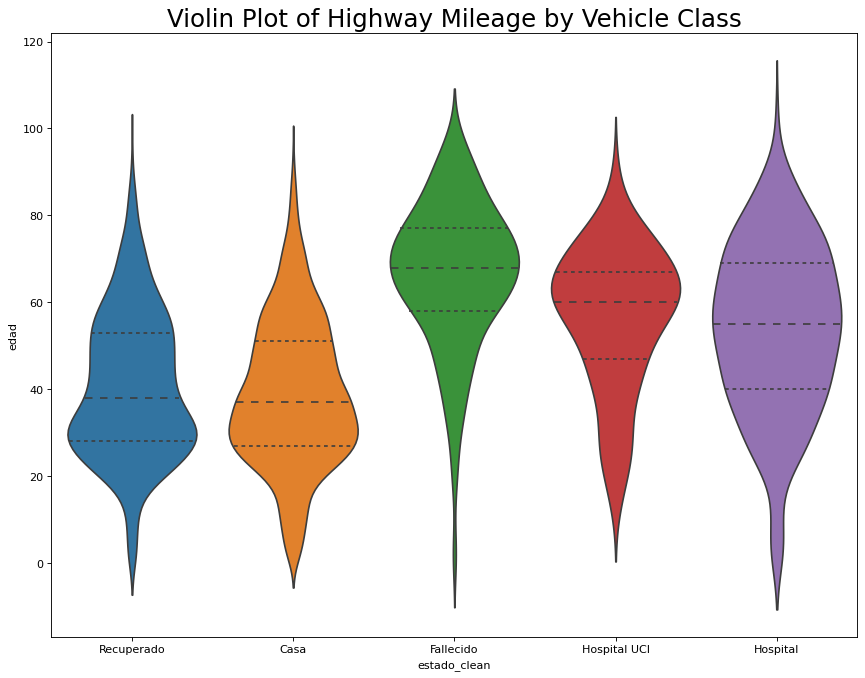

In [231]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='estado_clean', y='edad', data=covidpanda, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.show()


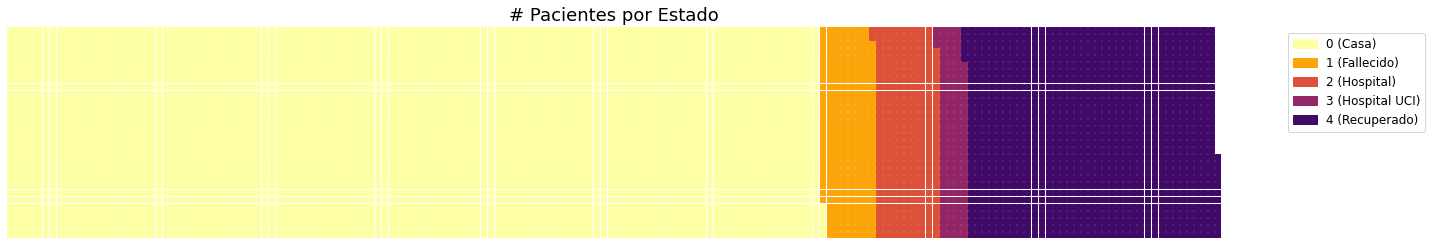

In [232]:
from pywaffle import Waffle

# Prepare Data
df = covidpanda.groupby('estado_clean').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['estado_clean', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Pacientes por Estado', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=30,
    colors=colors,
    figsize=(20, 5)
)

In [261]:
from pywaffle import Waffle

# Prepare Data
dfNivel = covidpanda.groupby('nivel_estado').size().reset_index(name='counts')
n_categories = dfNivel.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': dfNivel['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in dfNivel[['nivel_estado', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Pacientes por Estado', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=30,
    colors=colors,
    figsize=(20, 5)
)

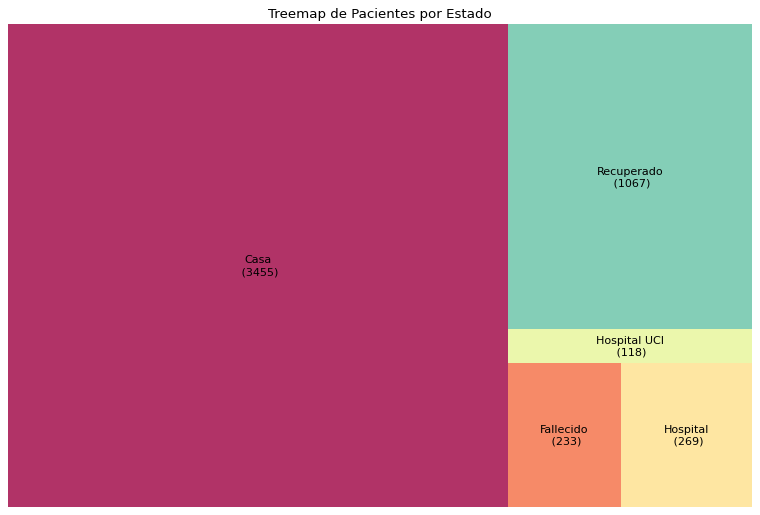

In [233]:
import squarify 
# Prepare Data
df = covidpanda.groupby('estado_clean').size().reset_index(name='counts')
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap de Pacientes por Estado')
plt.axis('off')
plt.show()

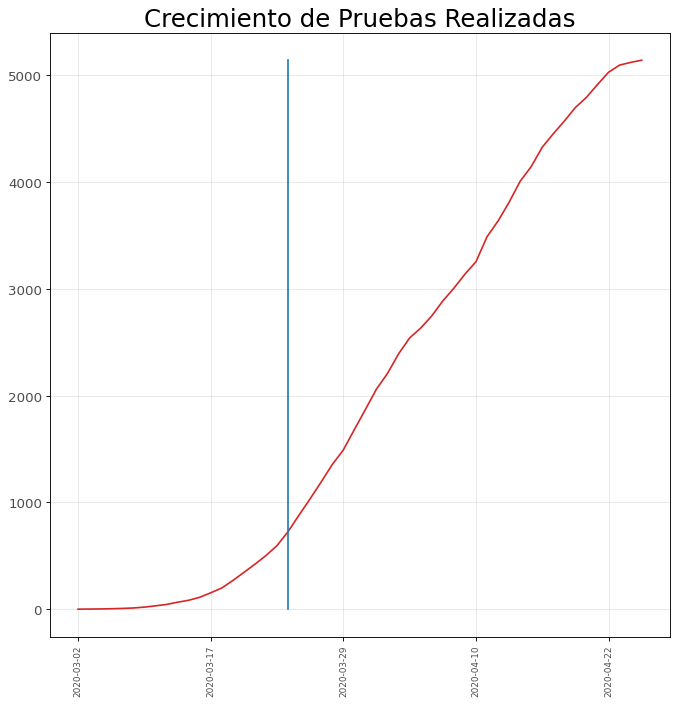

In [234]:
# Import Data
covidSerieNew = covidpanda.copy()
covidSerieNew['fecha_noti'] = covidSerieNew['fecha_noti'].str[:10]
covidSerieNew['fecha_noti'] = pd.to_datetime(covidSerieNew['fecha_noti'], format='%Y-%m-%d')

df = covidSerieNew.groupby('fecha_noti').size().reset_index(name='counts')
df= df.sort_values(by='fecha_noti', ascending=True)
df['fecha_noti'] = df.fecha_noti.astype(str)
df['cumsum'] = df['counts'].cumsum()

# Draw Plot
plt.figure(figsize=(10,10), dpi= 80)
markers_on = [5]
plt.plot('fecha_noti', 'cumsum', data=df, color='tab:red', markevery=markers_on)
max = df['cumsum'].max()
plt.plot(["2020-03-24","2020-03-24"],[0,max], "-")

# Decoration
#plt.ylim(0, 5000)
xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Realizadas", fontsize=22)
plt.grid(axis='both', alpha=.3)
 
plt.show()

In [0]:
df['indicador'] = df.iloc

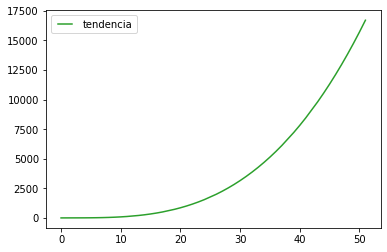

In [236]:
dfeTendPrueba = df.copy()
dfeTendPrueba['indicador'] = np.arange(len(dfeTendPrueba))
dfeTendPruebaLo = dfeTendPrueba.loc[0:19]
dfeTendPruebaLo

#Seleccionamos solamente la columna 6 del dataset
X_pT = np.array(dfeTendPruebaLo['indicador'])
#Defino los datos correspondientes a las etiquetas
y_pT = np.array(dfeTendPruebaLo['cumsum'])

#Seleccionamos solamente la columna 6 del dataset
X_pP = np.array(dfeTendPrueba['indicador'])
#Defino los datos correspondientes a las etiquetas
y_pP = np.array(dfeTendPrueba['cumsum'])

from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train_p, X_test_pD, y_train_p, y_test_pD = train_test_split(X_pT, y_pT, test_size=0.01)
X_train_pD, X_test_p, y_train_pD, y_test_p = train_test_split(X_pP, y_pP, test_size=0.9)

from sklearn.preprocessing import PolynomialFeatures
#Se define el grado del polinomio
poli_reg = PolynomialFeatures(degree = 3)

X_train_p = X_train_p.reshape(-1, 1)
X_test_p = X_test_p.reshape(-1, 1)
y_train_p = y_train_p.reshape(-1, 1)

#Se transforma las características existentes en características de mayor grado
X_train_poli = poli_reg.fit_transform(X_train_p)
X_test_poli = poli_reg.fit_transform(X_test_p)

#Defino el algoritmo a utilizar
from sklearn import linear_model
pr = linear_model.LinearRegression()

#Entreno el modelo
pr.fit(X_train_poli, y_train_p)

#Realizo una predicción
Y_pred_pr = pr.predict(X_test_poli)


x = np.array(X_test_p)
y = np.array(Y_pred_pr)

dffinal = pd.DataFrame(data=np.column_stack((x,y)),columns=['indicador','prediccion'])
dffinal= dffinal.sort_values(by='indicador', ascending=True)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot('indicador', 'prediccion', data=dffinal, color='tab:green', markevery=markers_on, label= "tendencia")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})
#plt.plot(X_test_p, Y_pred_pr, color='red', linewidth=3)
plt.show()


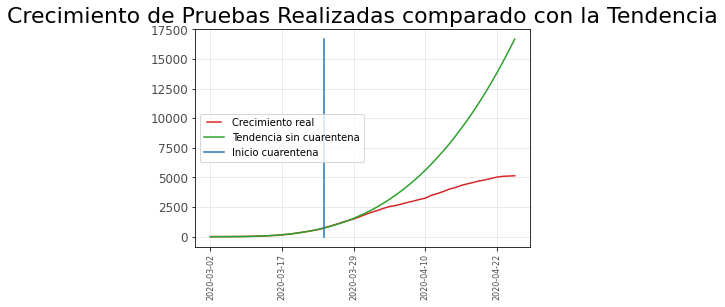

In [237]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot('fecha_noti', 'cumsum', data=df, color='tab:red', markevery=markers_on, label= "Crecimiento real")
line2, = plt.plot('indicador', 'prediccion', data=dffinal, color='tab:green', markevery=markers_on, label= "Tendencia sin cuarentena")
max = dffinal['prediccion'].max()
line3, = plt.plot(["2020-03-24","2020-03-24"],[0,max], "-", markevery=markers_on, label= "Inicio cuarentena")
plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Realizadas comparado con la Tendencia", fontsize=22)
plt.grid(axis='both', alpha=.3)

In [0]:
# Import Data
def dfFiltroEstado(estadoFiltrar):
  covidEstado = covidpanda[covidpanda.estado.str.contains(estadoFiltrar, case=False, regex=True)].copy()
  covidEstado['fecha_noti'] = covidEstado['fecha_noti'].str[:10]
  covidEstado['fecha_noti'] = pd.to_datetime(covidEstado['fecha_noti'], format='%Y-%m-%d')

  dfEstado = covidEstado.groupby('fecha_noti').size().reset_index(name='counts')
  dfEstado= dfEstado.sort_values(by='fecha_noti', ascending=True)
  dfEstado['fecha_noti'] = dfEstado.fecha_noti.astype(str)
  dfEstado['cumsum'] = dfEstado['counts'].cumsum()
  return dfEstado

dfFallecido = dfFiltroEstado("Fallecido")
dfRecuperado = dfFiltroEstado("Recuperado")
dfCasa = dfFiltroEstado("Casa")
dfHospitalUCI = dfFiltroEstado("Hospital UCI")
dfHospital = dfFiltroEstado("^Hospital$")

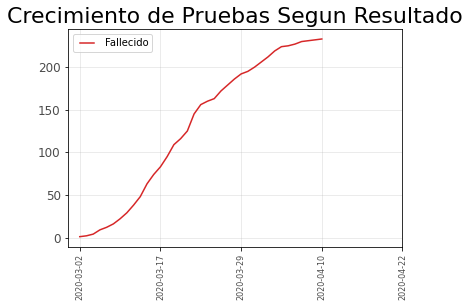

In [239]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot('fecha_noti', 'cumsum', data=dfFallecido, color='tab:red', markevery=markers_on, label= "Fallecido")
'''
line2, = plt.plot('fecha_noti', 'cumsum', data=dfRecuperado, color='tab:green', markevery=markers_on, label= "Recuperado")
line3, = plt.plot('fecha_noti', 'cumsum', data=dfCasa, color='tab:blue', markevery=markers_on, label= "Casa")
line4, = plt.plot('fecha_noti', 'cumsum', data=dfHospitalUCI, color='tab:gray', markevery=markers_on, label= "HospitalUCI")
line5, = plt.plot('fecha_noti', 'cumsum', data=dfHospital, color='tab:brown', markevery=markers_on, label= "Hospital")
'''
plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Segun Resultado", fontsize=22)
plt.grid(axis='both', alpha=.3)

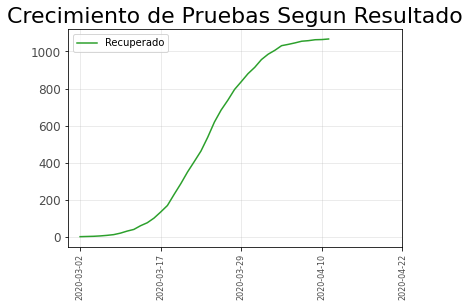

In [240]:
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot('fecha_noti', 'cumsum', data=dfFallecido, color='tab:red', markevery=markers_on, label= "Fallecido")
line2, = plt.plot('fecha_noti', 'cumsum', data=dfRecuperado, color='tab:green', markevery=markers_on, label= "Recuperado")
#line3, = plt.plot('fecha_noti', 'cumsum', data=dfCasa, color='tab:blue', markevery=markers_on, label= "Casa")
#line4, = plt.plot('fecha_noti', 'cumsum', data=dfHospitalUCI, color='tab:gray', markevery=markers_on, label= "HospitalUCI")
#line5, = plt.plot('fecha_noti', 'cumsum', data=dfHospital, color='tab:brown', markevery=markers_on, label= "Hospital")

plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Segun Resultado", fontsize=22)
plt.grid(axis='both', alpha=.3)

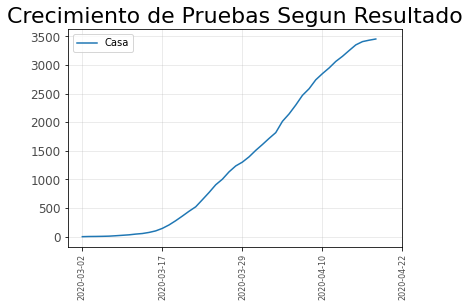

In [241]:
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot('fecha_noti', 'cumsum', data=dfFallecido, color='tab:red', markevery=markers_on, label= "Fallecido")
#line2, = plt.plot('fecha_noti', 'cumsum', data=dfRecuperado, color='tab:green', markevery=markers_on, label= "Recuperado")
line3, = plt.plot('fecha_noti', 'cumsum', data=dfCasa, color='tab:blue', markevery=markers_on, label= "Casa")
#line4, = plt.plot('fecha_noti', 'cumsum', data=dfHospitalUCI, color='tab:gray', markevery=markers_on, label= "HospitalUCI")
#line5, = plt.plot('fecha_noti', 'cumsum', data=dfHospital, color='tab:brown', markevery=markers_on, label= "Hospital")

plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Segun Resultado", fontsize=22)
plt.grid(axis='both', alpha=.3)

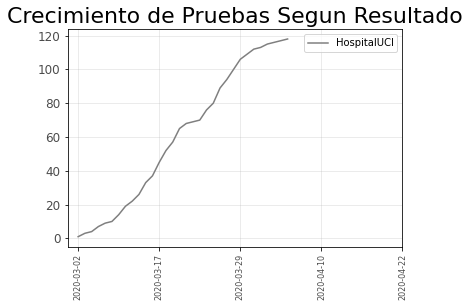

In [242]:
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot('fecha_noti', 'cumsum', data=dfFallecido, color='tab:red', markevery=markers_on, label= "Fallecido")
#line2, = plt.plot('fecha_noti', 'cumsum', data=dfRecuperado, color='tab:green', markevery=markers_on, label= "Recuperado")
#line3, = plt.plot('fecha_noti', 'cumsum', data=dfCasa, color='tab:blue', markevery=markers_on, label= "Casa")
line4, = plt.plot('fecha_noti', 'cumsum', data=dfHospitalUCI, color='tab:gray', markevery=markers_on, label= "HospitalUCI")
#line5, = plt.plot('fecha_noti', 'cumsum', data=dfHospital, color='tab:brown', markevery=markers_on, label= "Hospital")

plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Segun Resultado", fontsize=22)
plt.grid(axis='both', alpha=.3)

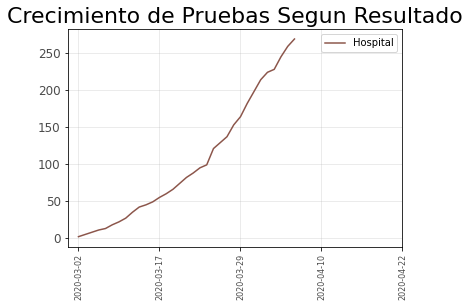

In [243]:
from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot('fecha_noti', 'cumsum', data=dfFallecido, color='tab:red', markevery=markers_on, label= "Fallecido")
#line2, = plt.plot('fecha_noti', 'cumsum', data=dfRecuperado, color='tab:green', markevery=markers_on, label= "Recuperado")
#line3, = plt.plot('fecha_noti', 'cumsum', data=dfCasa, color='tab:blue', markevery=markers_on, label= "Casa")
#line4, = plt.plot('fecha_noti', 'cumsum', data=dfHospitalUCI, color='tab:gray', markevery=markers_on, label= "HospitalUCI")
line5, = plt.plot('fecha_noti', 'cumsum', data=dfHospital, color='tab:brown', markevery=markers_on, label= "Hospital")

plt.plot()
plt.legend(handler_map={line1: HandlerLine2D(numpoints=4)})

xtick_location = df.index.tolist()[::12]
xtick_labels = [x[-10:] for x in df.fecha_noti.tolist()[::12]]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=8, horizontalalignment='center', alpha=.7)
plt.yticks(fontsize=12, alpha=.7)
plt.title("Crecimiento de Pruebas Segun Resultado", fontsize=22)
plt.grid(axis='both', alpha=.3)

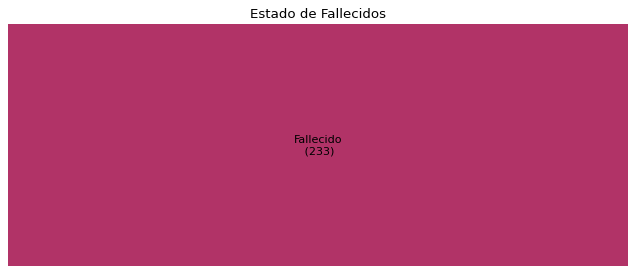

In [254]:
# pip install squarify
import squarify 

# Prepare Data
dftreeFallecido = covidpanda[covidpanda.estado.str.contains("Fallecido", case=False, regex=True)].copy()
dftreeFallecido = dftreeFallecido.groupby('nivel_estado').size().reset_index(name='counts')
labels = dftreeFallecido.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreeFallecido['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Estado de Fallecidos')
plt.axis('off')
plt.show()

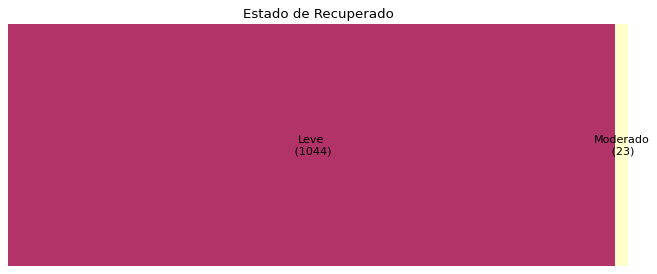

In [256]:
# pip install squarify
import squarify 

# Prepare Data
dftreeRecuperado = covidpanda[covidpanda.estado.str.contains("Recuperado", case=False, regex=True)].copy()
dftreeRecuperado = dftreeRecuperado.groupby('nivel_estado').size().reset_index(name='counts')
labels = dftreeRecuperado.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreeRecuperado['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Estado de Recuperado')
plt.axis('off')
plt.show()

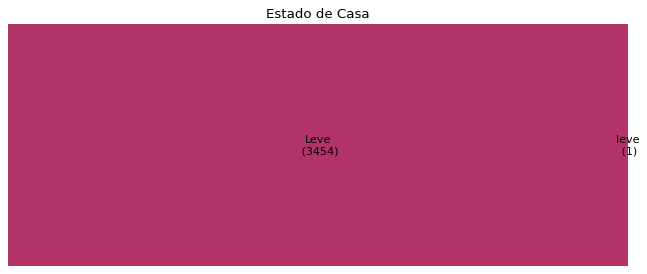

In [257]:
# pip install squarify
import squarify 

# Prepare Data
dftreeCasa = covidpanda[covidpanda.estado.str.contains("Casa", case=False, regex=True)].copy()
dftreeCasa = dftreeCasa.groupby('nivel_estado').size().reset_index(name='counts')
labels = dftreeCasa.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreeCasa['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Estado de Casa')
plt.axis('off')
plt.show()

In [258]:
# pip install squarify
import squarify 

# Prepare Data
dftreeHospital = covidpanda[covidpanda.estado.str.contains("^Hospital$", case=False, regex=True)].copy()
dftreeHospital = dftreeHospital.groupby('nivel_estado').size().reset_index(name='counts')
labels = dftreeHospital.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreeHospital['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Estado de Hospital')
plt.axis('off')
plt.show()

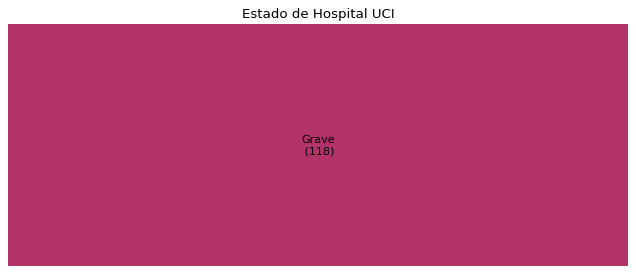

In [259]:
# pip install squarify
import squarify 

# Prepare Data
dftreeHospitalUCI = covidpanda[covidpanda.estado.str.contains("UCI", case=False, regex=True)].copy()
dftreeHospitalUCI = dftreeHospitalUCI.groupby('nivel_estado').size().reset_index(name='counts')
labels = dftreeHospitalUCI.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = dftreeHospitalUCI['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10, 4), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Estado de Hospital UCI')
plt.axis('off')
plt.show()

In [0]:
volver las variables numericas para ver relacion entre ellas